**Fuentes:**

- https://cs.stackexchange.com/questions/16545/what-is-the-difference-between-a-neural-network-a-deep-learning-system-and-a-de
- https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
- https://www.juanbarrios.com/redes-neurales-convolucionales/

# 1. Convolutional Neural Networks

La **CNN** es un tipo de ANN que mediante aprendizaje supervisado  procesa sus capas del mismo modo que lo haría un ojo humano  para identificar distintas características en los inputs que hacen que pueda identificar objetos . Para ello, la CNN contiene varias capas ocultas especializadas y que pueden aprender jerarquías de patrones: esto quiere decir que las primeras capas pueden detectar lineas, curvas y se van especializando hasta llegar a capas más profundas que reconocen formas complejas como un rostro o la silueta de un animal.

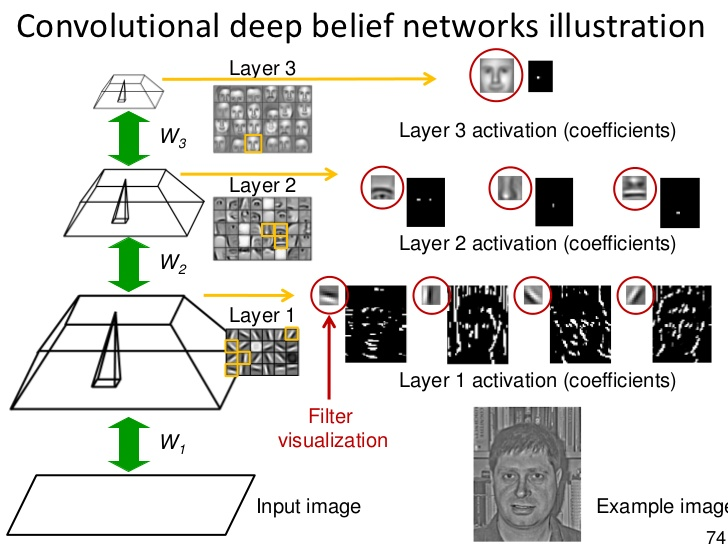

In [ ]:
# Convolución
from IPython.display import Image
Image(filename="images/conv_gif.gif")

El kernel se desliza sobre el input para aplicar la convolución. Lo que se está haciendo es  dividir el input (3D tensor) en parches y aplicar la operación convolución (la misma en cada capa) a cada parche. La convolución desliza cada parche sobre el input, aplicando la transformación a cada posible posición.

El output serás un mapa de features o **mapa de activaciones** (cada una el resultado de aplicar la transformacion). Dicho mapa tendra dimensiones **height x width x nº filtros**. Cada capa del volumen (eje z) es el resultado de aplicar un filtro a cada parche del input



En la mayoría de las imágenes se tienen 3 canales de colores. En el caso de un solo canal (gray-scale), filtro y kernel son conceptos similares, pero en el caso general un **filtro** es una colección de kernels, ya que hay un kerner por cada cada canal de entrada, y en una capa convolucional produce únicamente un canal de salida.




In [ ]:
Image(filename="images/conv_1.gif")

Cada una de los elementos obtenidos por cada canal, se suman para formar un único canal El kernel de un filtro produce una versión de cada canal, y el filtro en cojunto proudce una canal de salida general.

In [ ]:
Image(filename="images/conv_2.gif")

Se suma el bias.

In [ ]:
Image(filename="images/conv_3.gif")

Cada filtro procesa la entrada con su  conjunto  de núcleos y un bias, produciendo un solo canal de salida. Luego se concatenan para producir la salida general, siendo el número de canales de salida el número de filtros. Finalmente, se suele aplicar una no linealidad antes de pasarel output como input a otra capa convolucional.

### Striding

El hiperparámetro **stride** sirve para definir las posiciones que se va a desplazar el kernel. Cuanto más se desplace, más se disminuyen las dimensiones de salida.

In [ ]:
Image(filename="images/striding.gif")

### Padding

En las redes convolucionales se puede se pueden rellenar con ceros los bordes del input para no perder información, y esto se denomina **zero-padding**. Sin zero padding, el tamaño de la red se reduciría más drásticamente o habría que utilizar kernels más pequeños, lo que reduciría más rápidamente la extensión de la red.

El caso opuesto a zero padding se denomina **valid** y el kernel solo podrá operar las posiciones en las que el núcleo esté completamente contenido en la imagen. Con el valor **same** se estaría aplicando el relleno suficiente para que el tamaño de entrada y salida sea el mismo.

In [ ]:
Image(filename="images/padding.gif")

### Pooling

El **pooling** sirve para disminuir las dimensiones del mapa de activación que sale de la capa convolucional y la función de activación. Las más comunes con MaxPooling y AveragePooling.

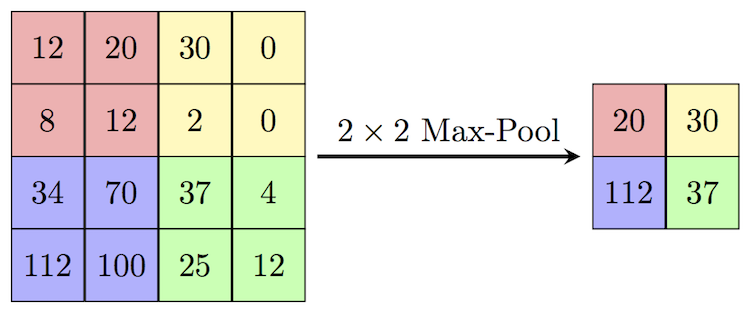

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

# Red con pooling
convnet_pooling = models.Sequential()

## Base Model
# Primer bloque convolucional
convnet_pooling.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
convnet_pooling.add(layers.Conv2D(32,(3,3),activation='relu'))
convnet_pooling.add(layers.MaxPooling2D((2,2)))

# Segundo bloque convolucional
convnet_pooling.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet_pooling.add(layers.MaxPooling2D((2,2)))

# Top Model para Clasificar
convnet_pooling.add(layers.Flatten())
convnet_pooling.add(layers.Dense(256,activation='relu'))
convnet_pooling.add(layers.Dense(8,activation='softmax'))

convnet_pooling.summary()

# 2. Práctica

In [ ]:
# Se carga el conjunto de datos
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import LabelBinarizer
print("[INFO]: Loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
labelNames = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]
print(trainX.shape)
print(trainY.shape)

In [ ]:
# Visualización de datos
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,10))
for n in range(1, 29):
    fig.add_subplot(4, 6, n)
    img = trainX[n]
    plt.imshow(img)
    plt.title(labelNames[trainY[n][0]])
    plt.axis('off')

### Se crea la red neuronal (perceptrón multicapa ) y se entrena

In [ ]:

import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Arquitectura de red
# Definimos el modo API Sequential
model = Sequential() #(X)
model.add(Flatten()) #(X)

# Primera capa oculta
model.add(Dense(2048, input_shape=(32*32*3,), activation="relu")) #(X)
#model.add(Dropout(0.5))

# Segunda capa oculta
model.add(Dense(1024, activation="relu")) #(X)
#model.add(Dropout(0.5))

# Tercera capa oculta
model.add(Dense(512, activation="relu")) #(X)
#model.add(Dropout(0.5))

# Cuarta capa oculta
model.add(Dense(128, activation="relu")) #(X)
#model.add(Dropout(0.5))

# Quinta capa oculta
model.add(Dense(32, activation="relu")) #(X)

# Capa de salida
model.add(Dense(10, activation="softmax")) #(X)


# Se compila el modelo y se entrena
print("[INFO]: Entrenando red neuronal...")

model.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(0.01), metrics=["accuracy"]) 

# Se entrena el perceptrón multicapa
H = model.fit(trainX, trainY, validation_split=0.2, epochs=50, batch_size=32) #(X)

# Evaluación del modelo
print("[INFO]: Evaluando modelo...")
# Efectuamos predicciones
predictions = model.predict(testX, batch_size=32) #(X)
# Obtenemos el report
print(classification_report(testY, predictions.argmax(axis=1), target_names=labelNames)) # Etiquetas en decimal #(X)


# Análisis
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

### Se crea la red neuronal (CNN) y se entrena 

In [ ]:

import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from google.colab import drive

# Arquitectura de red


#BASE MODEL
# Definimos entradas
inputs = Input(shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3]))

# Primer set de capas CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs) 
x1 = BatchNormalization()(x1) 
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1) 
x1 = BatchNormalization()(x1) 
x1 = MaxPooling2D(pool_size=(2, 2))(x1) 
x1 = Dropout(0.25)(x1) 

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1) #(X)
x2 = BatchNormalization()(x2) #(X)
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2) #(X)
x2 = BatchNormalization()(x2) #(X)
x2 = MaxPooling2D(pool_size=(2, 2))(x2) #(X)
x2 = Dropout(0.25)(x2) #(X)

# Tercer set de capas CONV => RELU => CONV => RELU => POOL
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2) #(X)
x3 = BatchNormalization()(x3) #(X)
x3 = Conv2D(256, (3, 3), padding="same", activation="relu")(x3) #(X)
x3 = BatchNormalization()(x3) #(X)
x3 = MaxPooling2D(pool_size=(2, 2))(x3) #(X)
x3 = Dropout(0.25)(x3) #(X)

# TOP MODEL
# Primer (y único) set de capas FC => RELU
xfc = Flatten()(x3) #(X)
xfc = Dense(512, activation="relu")(xfc) #(X)
xfc = BatchNormalization()(xfc) #(X)
xfc = Dropout(0.5)(xfc) #(X)

# Clasificador softmax
predictions = Dense(10, activation="softmax")(xfc) #(X)


model_cnn = Model(inputs=inputs, outputs=predictions) #(X)

# Compilar el modelo
print("[INFO]: Compilando el modelo...")
model_cnn.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(lr=0.0001,decay=0, beta_1=0.9, beta_2=0.9999, epsilon=1e-08), metrics=["accuracy"]) #(X)

# Entrenamiento de la red
print("[INFO]: Entrenando la red...")
H = model_cnn.fit(trainX, trainY, validation_split=0.2, batch_size=128, epochs=50, verbose=1) 


# Almacenar el modelo en drive
drive.mount('/content/drive') 
model_cnn.save(BASE_FOLDER+"deepCNN_CIFAR10.h5") 

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")

predictions = model_cnn.predict(testX, batch_size=128) 
# Sacamos el report para test
print(classification_report(testY, predictions.argmax(axis=1), target_names=labelNames))

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

### Data Augmentation

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
print(trainY.shape)
print(testY.shape)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15, # grados de rotacion aleatoria
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    horizontal_flip=True, 
    
    zoom_range=0.2,
)

In [ ]:
# Visualización de los nuevos datos sintéticos
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

sample = 45
plt.imshow(image.array_to_img(trainX[sample]))
plt.show()
print('Label = {}'.format(labelNames[trainY[sample].argmax(axis=0)]))

fig, axes = plt.subplots(2,2)
i = 0
for batch in datagen.flow(trainX[sample].reshape((1,32,32,3)),batch_size=1):
    #plt.figure(i)
    axes[i//2,i%2].imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break
plt.show()

In [ ]:
# Arquitectura de red

import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from google.colab import drive

# Arquitectura


inputs = Input(shape=(trainX.shape[1], trainX.shape[2], trainX.shape[3]))

# Primer set de capas CONV => RELU => CONV => RELU => POOL
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(inputs) 
x1 = BatchNormalization()(x1) 
x1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x1) 
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1) 
x1 = Dropout(0.25)(x1) 

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x1) 
x2 = BatchNormalization()(x2) 
x2 = Conv2D(64, (3, 3), padding="same", activation="relu")(x2) 
x2 = BatchNormalization()(x2) 
x2 = MaxPooling2D(pool_size=(2, 2))(x2) 
x2 = Dropout(0.25)(x2) 

# Segundo set de capas CONV => RELU => CONV => RELU => POOL
x2 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2) 
x2 = BatchNormalization()(x2) 
x2 = Conv2D(256, (3, 3), padding="same", activation="relu")(x2) 
x2 = BatchNormalization()(x2) 
x2 = MaxPooling2D(pool_size=(2, 2))(x2) 
x2 = Dropout(0.25)(x2) 

# Primer (y único) set de capas FC => RELU
xfc = Flatten()(x2) 
xfc = Dense(512, activation="relu")(xfc) 
xfc = BatchNormalization()(xfc) 
xfc = Dropout(0.5)(xfc) 

predictions = Dense(10, activation="softmax")(xfc) 


model_aug = Model(inputs=inputs, outputs=predictions) 


print("[INFO]: Compilando el modelo...")
model_aug.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08), metrics=["accuracy"]) 

# Entrenamiento 
print("[INFO]: Entrenando la red...")
H_aug = model_aug.fit(datagen.flow(trainX, trainY, batch_size=128),
                                steps_per_epoch = len(trainX)*2/ 128, epochs=50, validation_data=(testX, testY))

drive.mount('/content/drive') 
model_aug.save(BASE_FOLDER+"deepCNN_CIFAR10_aug.h5") 

# Evaluación del modelo
print("[INFO]: Evaluando el modelo...")

predictions = model_aug.predict(testX, batch_size=128) 

print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)) 

# Gráficas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H_aug.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H_aug.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H_aug.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H_aug.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()